In [3]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
SEED = 42

In [4]:
df=pd.read_csv('dv.csv')

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
X = df[['Glucose','BMI']]

In [8]:
y = df['Outcome']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

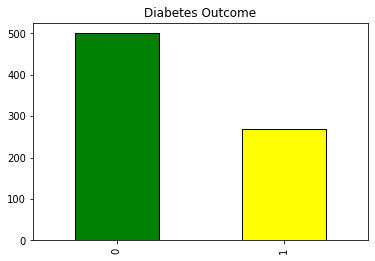

In [11]:
print(df.Outcome.value_counts())
df['Outcome'].value_counts().plot('bar',color=['green','yellow'],edgecolor=['black']).set_title('Diabetes Outcome')

In [12]:
info = ["Number of times pregnant",
"Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
"Diastolic blood pressure (mm Hg)",
"Triceps skin fold thickness (mm)",
"2-Hour serum insulin (mu U/ml)",
"Body mass index (weight in kg/(height in m)^2)",
"Diabetes pedigree function",
"Age (years)",
"Class variable (0 or 1) 268 of 768 are 1, the others are 0"]
for i in range (len(info)):
    print(df.columns[i],"-->",info[i])
df.Outcome.value_counts()[1] / df.Outcome.count()

Pregnancies --> Number of times pregnant
Glucose --> Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure --> Diastolic blood pressure (mm Hg)
SkinThickness --> Triceps skin fold thickness (mm)
Insulin --> 2-Hour serum insulin (mu U/ml)
BMI --> Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction --> Diabetes pedigree function
Age --> Age (years)
Outcome --> Class variable (0 or 1) 268 of 768 are 1, the others are 0


0.3489583333333333

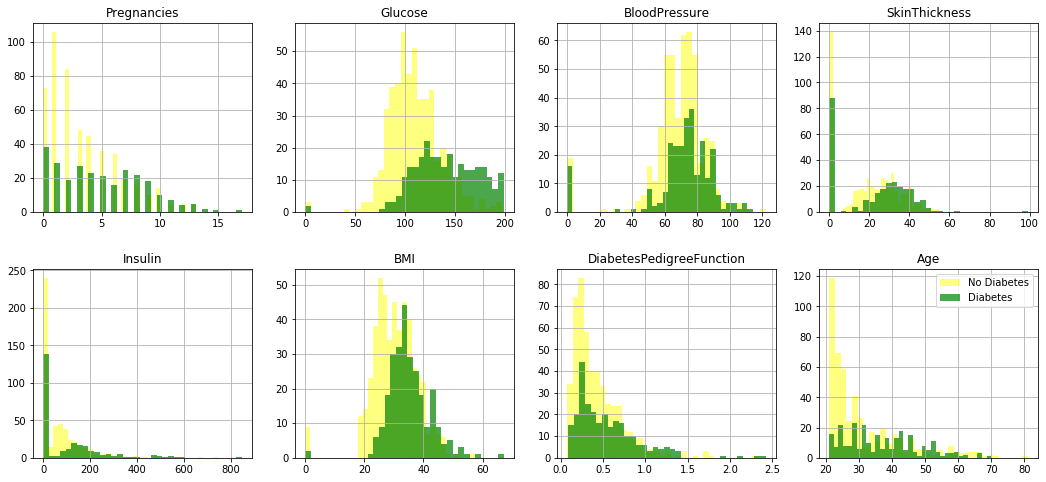

In [13]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    df[df.Outcome==0][feature].hist(bins=35, color='yellow', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='green', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)


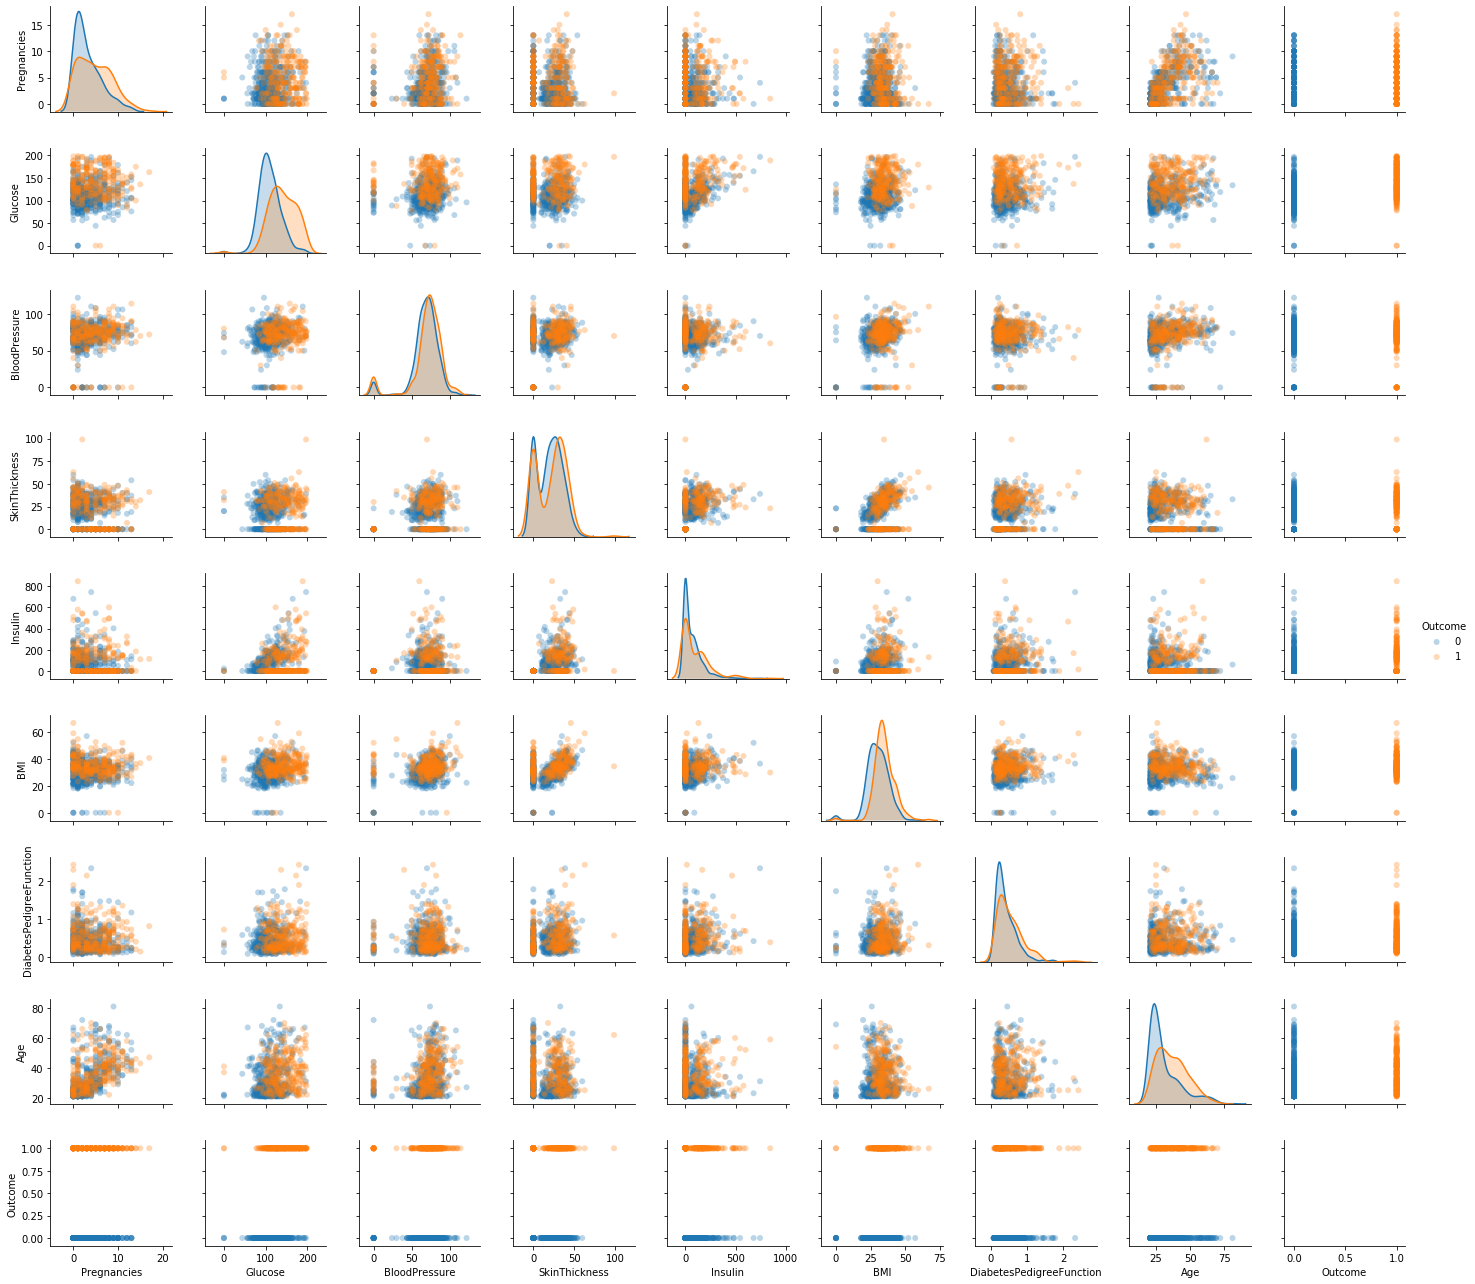

In [15]:
# to visualise pair plot
sns.pairplot(df, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

Text(0.5, 1.0, 'Top Features derived by Random Forest')

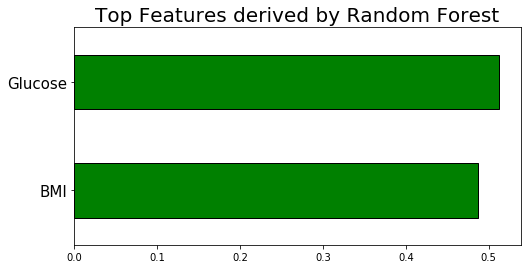

In [16]:
from sklearn.ensemble import RandomForestClassifier
SEED = 42
# Create decision tree classifer object
rfc = RandomForestClassifier(random_state=SEED, n_estimators=100)

# Train model, note that NO scaling is required
rfc_model = rfc.fit(X, y)

# Plot the top features based on its importance
(pd.Series(rfc_model.feature_importances_, index=X.columns)
    .nlargest(10)   # can adjust based on how many top features you want
    .plot(kind='barh', figsize=[8,4],color=['green'],edgecolor=['black'])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

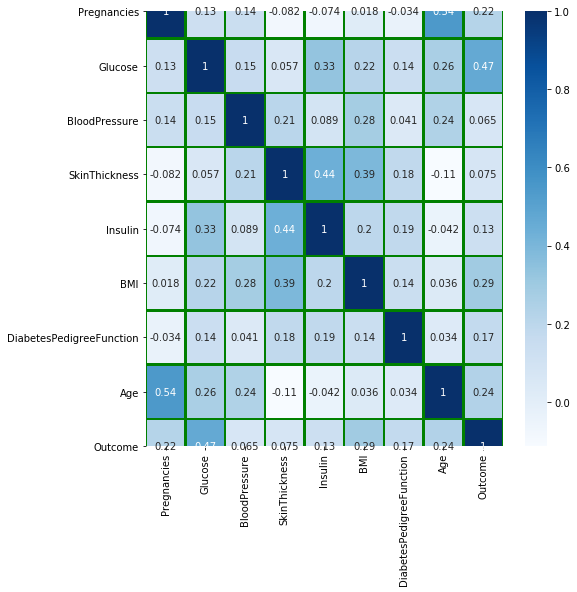

In [17]:
df.corr()
plt.figure(figsize=[8,8])
sns.heatmap(df.corr(),annot=True, cmap='Blues', linecolor='Green', linewidths=1.5)
plt.show()

Accuracy score of Training data is: 0.7914338919925512
Accuracy score of Test data is: 0.7186147186147186


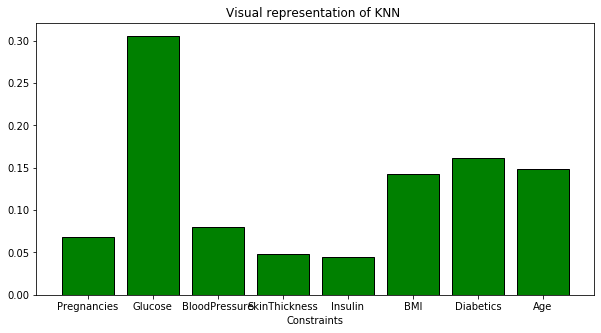

In [31]:
X = df.iloc[:,0 :-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=63)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.predict(X_test)
score = knn.score(X_train,y_train)
score1 = knn.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

kt = tre.feature_importances_
kt
ax=plt.figure(figsize=(10,5))
plt.bar(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabetics','Age' ],kt,color=['green'],edgecolor=['black'])
plt.title('Visual representation of KNN ')
plt.xlabel('Constraints')
plt.show()

Accuracy score of Training data is: 0.7914338919925512
Accuracy score of Test data is 0.7186147186147186


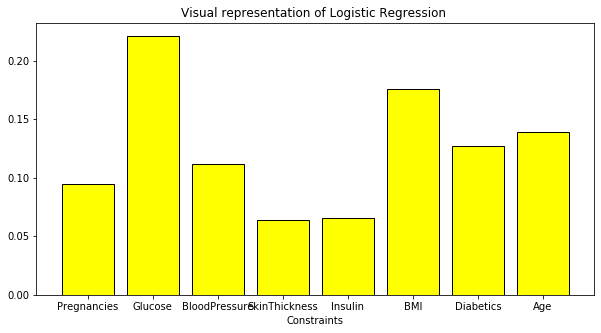

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=10)
logreg.fit(X_train,y_train)
logreg.predict(X_test)
score2= logreg.score(X_train,y_train)
score3 = logreg.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is",score1)


lt = forest.feature_importances_
lt
ax=plt.figure(figsize=(10,5))
plt.bar(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabetics','Age' ],lt,color=['yellow'],edgecolor=['black'])
plt.xlabel('Constraints')
plt.title('Visual representation of Logistic Regression ')
plt.show()


Accuracy score of Training data is: 0.7914338919925512
Accuracy score of Test data is: 0.7186147186147186


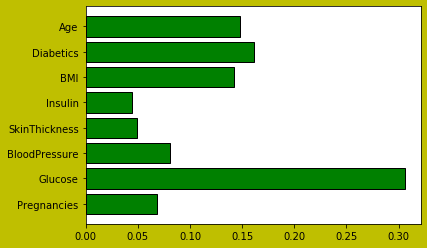

In [20]:
from sklearn.tree import DecisionTreeClassifier
tre = DecisionTreeClassifier()
tre.fit(X_train,y_train)
tre.predict(X_test)
score4 = tre.score(X_train,y_train)
score5 =tre.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

featur_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabetics','Age' ]
dt = tre.feature_importances_
dt
plt.figure(facecolor='y')
plt.barh(featur_names, dt,color=['green'],edgecolor=['black'])
plt.show()

Accuracy score of Training data is: 0.7914338919925512
Accuracy score of Test data is: 0.7186147186147186


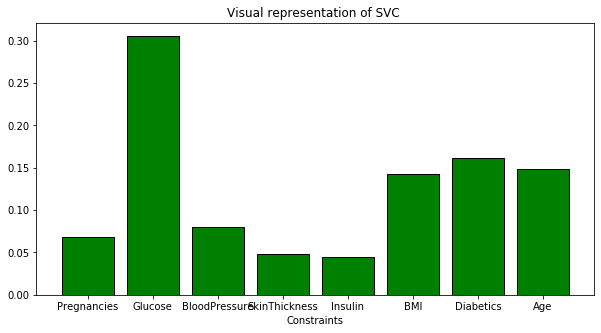

In [21]:
from sklearn.svm import SVC
svcc= SVC()
svcc.fit(X_train,y_train)
svcc.predict(X_test)
score6 = svcc.score(X_train,y_train)
score7 =svcc.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)


st = tre.feature_importances_
st
ax=plt.figure(figsize=(10,5))
plt.bar(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabetics','Age' ],st,color=['green'],edgecolor=['black'])
plt.title('Visual representation of SVC ')
plt.xlabel('Constraints')
plt.show()

Accuracy score of Training data is: 0.7914338919925512
Accuracy score of Test data is: 0.7186147186147186


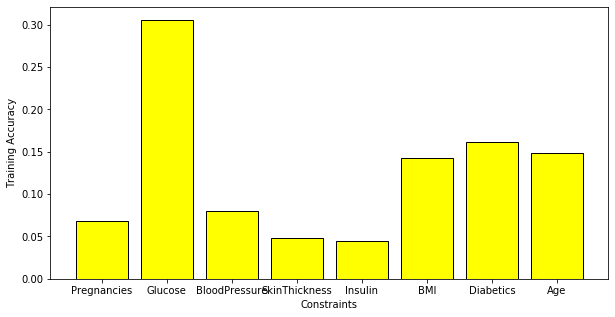

In [22]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)
gb.predict(X_test)
score8 = gb.score(X_train,y_train)
score9 =gb.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

kt = tre.feature_importances_
kt
ax=plt.figure(figsize=(10,5))
plt.bar(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabetics','Age' ],kt,color=['yellow'],edgecolor=['black'])
plt.ylabel('Training Accuracy')
plt.xlabel('Constraints')
plt.show()

Accuracy score of Training data is: 0.7914338919925512
Accuracy score of Test data is: 0.7186147186147186


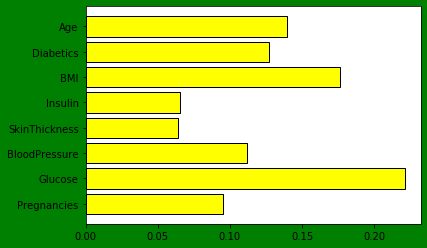

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
forest.predict(X_test)
score10 = forest.score(X_train,y_train)
score11 = forest.score(X_test,y_test)
print("Accuracy score of Training data is:",score)
print("Accuracy score of Test data is:",score1)

featur_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabetics','Age' ]
forest1 = forest.feature_importances_
forest1
plt.figure(facecolor='g')
plt.barh(featur_names, forest1,color=['yellow'],edgecolor=['black'])
plt.show()

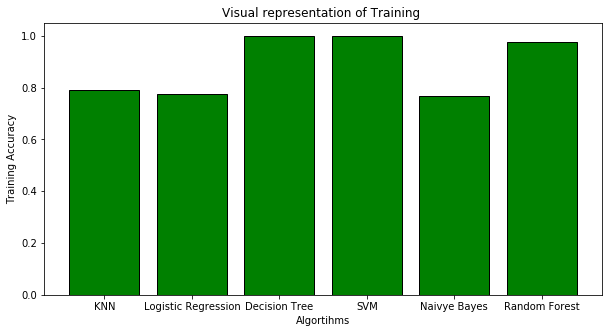

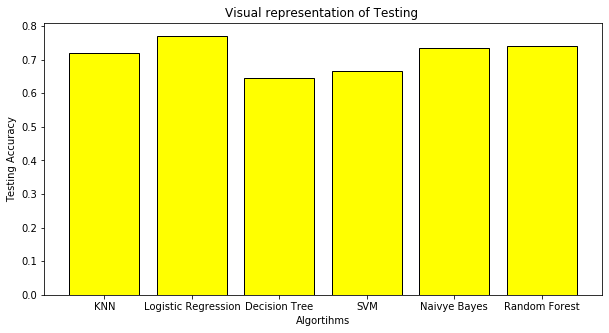

In [24]:
ax=plt.figure(figsize=(10,5))
plt.bar(['KNN','Logistic Regression','Decision Tree','SVM','Naivye Bayes','Random Forest'],[score,score2,score4,score6,score8,score10],color=['green'],edgecolor=['black'])
plt.ylabel('Training Accuracy')
plt.xlabel('Algortihms')
plt.title('Visual representation of Training ')
plt.show()

ax=plt.figure(figsize=(10,5))
plt.bar(['KNN','Logistic Regression','Decision Tree','SVM','Naivye Bayes','Random Forest'],[score1,score3,score5,score7,score9,score11],color=['yellow'],edgecolor=['black'])
plt.ylabel('Testing Accuracy')
plt.xlabel('Algortihms')
plt.title('Visual representation of Testing ')
plt.show()

In [33]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier()
randomforest.fit(X_train,y_train)
ss=randomforest.predict(X_test)
import numpy as np
anss=True
while anss==True:
    inn=input("Are your Male or Female?(Type male or female.)")
    if inn.lower()=="female":        
        a=input("Please enter Number of times pregnant(Pregnancies)? : ")
        b=input("Please enter the value of  Plasma glucose concentration a 2 hours in an oral glucose tolerance test(Gulcose)? : ")
        c=input("Please enter the value of Diastolic blood pressure in mm Hg (Blood Pressure)? : ")
        d=input("Please enter the value of Triceps skin fold thickness in mm (Skin Thickness)? : ")
        e=input("Please enter the value of 2-Hour serum insulin in mu U/ml (Insulin)? : ")
        f=input("Please enter the value of Body mass index (weight in kg/(height in m)^2) (BMI)? : ")
        g=input("Please enter the value of Diabetes pedigree function? (Diabetes Pedigree Function): ")
        h=input("Please enter the value of age? (Age)")
        lis=[a,b,c,d,e,f,g,h]
        lis= np.array(lis).reshape(1,-1).astype(float)
        aa = randomforest.predict(lis)
        ss =list(aa)
        lia= ["Congratulations, You have no chance of diabetes. Stay healthy", "Sorry, There is chance that you may suffer from diabetes."]
        print(lia[ss[0]])
        break
    elif inn.lower()=="male":
        print("Sorry, we don't predict the diabetes of males right now")

Are your Male or Female?(Type male or female.)male
Sorry, we don't predict the diabetes of males right now
Are your Male or Female?(Type male or female.)female
Please enter Number of times pregnant(Pregnancies)? : 1
Please enter the value of  Plasma glucose concentration a 2 hours in an oral glucose tolerance test(Gulcose)? : 2
Please enter the value of Diastolic blood pressure in mm Hg (Blood Pressure)? : 3
Please enter the value of Triceps skin fold thickness in mm (Skin Thickness)? : 4
Please enter the value of 2-Hour serum insulin in mu U/ml (Insulin)? : 5
Please enter the value of Body mass index (weight in kg/(height in m)^2) (BMI)? : 6
Please enter the value of Diabetes pedigree function? (Diabetes Pedigree Function): 7
Please enter the value of age? (Age)8
Congratulations, You have no chance of diabetes. Stay healthy


In [27]:
model = KNeighborsClassifier()
#model = LogisticRegression()
#model = GaussianNB()
#model =  LinearRegression()

model.fit(X_train,y_train)
prediction = model.predict(X_test)
accuracy_score(y_test,prediction)

0.7186147186147186

In [28]:
#The unknown: given  a person whose Glucose value is 160 and Insulin value is 30
new_df = pd.DataFrame([[160,30,2,3,4,5,6,7]])

# We predict the outcome
prediction = model.predict(new_df)

print(prediction)

[0]


In [29]:
#probability of prediction
new = model.predict_proba(new_df)[:]
msg = ''

if prediction == 0:
    msg = 'Normal'
elif prediction == 1:
    msg = 'Prediabetic'
else:
    msg = 'Diabetic'

Proba = int(((new[:,1])) * 100)
print('Your daibetes status is:' , msg, 'and you have {}%'.format(Proba), 'chances of being diabetic')

Your daibetes status is: Normal and you have 0% chances of being diabetic


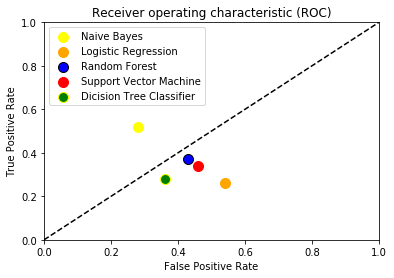

In [30]:
# fpr, tpr
naive_bayes = np.array([0.28, 0.52])
logistic = np.array([0.54, 0.26])
random_forest = np.array([0.43, 0.37])
ann = np.array([0.36, 0.44])
svm = np.array([0.46, 0.34])
dt = np.array([0.52, 0.28])

#plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='yellow', edgecolors='yellow', s=100)
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=100)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=100)
plt.scatter(svm[0], svm[1], label = 'Support Vector Machine', facecolors='red', edgecolors='red', s=100)
plt.scatter(ann[0], dt[1], label = 'Dicision Tree Classifier', facecolors='green', edgecolors='yellow', s=100)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc='upper left')

plt.show()